In [1]:
import pandas as pd
import numpy as np
import scanpy as sc
import sys
import os
import re
import matplotlib.pyplot as plt
import seaborn as sns
import io

In [2]:
def printdf(df, round=2):
    with io.StringIO() as buffer:
        df.round(round).to_csv(buffer, sep=' ', index=False)
        print(buffer.getvalue())

In [3]:
dpath = "/scratch/indikar_root/indikar1/cstansbu/scpc_test/reports/flagstat/"

def read_flagstat(fpath):
    """A hacky function to read the important lines of 
    the samtools flagstat report """
    keepers = [0, 1, 2, 3, 6, 7, 8, 9]
    tmp = pd.read_csv(fpath, 
                      sep='\t', 
                      header=None)
    tmp.columns = ['value', 'drop', 'metric']
    tmp = tmp.iloc[keepers]
    tmp = tmp[['metric', 'value']]
    tmp['value'] = tmp['value'].apply(lambda x: x.replace("%", ""))
    tmp['value'] = tmp['value'].astype(float)
    return tmp

df = []
for f in os.listdir(dpath):
    fpath = f"{dpath}{f}"
    sample = f[:2]
    cell = f[2:5]
    ref = f.split(".")[1]

    tmp = read_flagstat(fpath)
    tmp['cell'] = cell
    tmp['sample'] = sample
    tmp['ref'] = ref
    df.append(tmp)


df = pd.concat(df)
df = pd.pivot_table(df, index=['sample', 'cell', 'ref'],
                    columns='metric',
                    values='value').reset_index()
df.head()

metric,sample,cell,ref,mapped,mapped %,primary,primary mapped,primary mapped %,secondary,supplementary,total (QC-passed reads + QC-failed reads)
0,o1,b01,129S1_SvImJ,3981.0,56.32,4893.0,1806.0,36.91,1381.0,794.0,7068.0
1,o1,b01,CAST_EiJ,3896.0,55.74,4893.0,1799.0,36.77,1312.0,785.0,6990.0
2,o1,b01,GRCm39,4165.0,57.59,4893.0,1826.0,37.32,1571.0,768.0,7232.0
3,o1,b02,129S1_SvImJ,2597643.0,86.66,1520854.0,1120904.0,73.70,879221.0,597518.0,2997593.0
4,o1,b02,CAST_EiJ,2569516.0,86.16,1520854.0,1107950.0,72.85,850775.0,610791.0,2982420.0


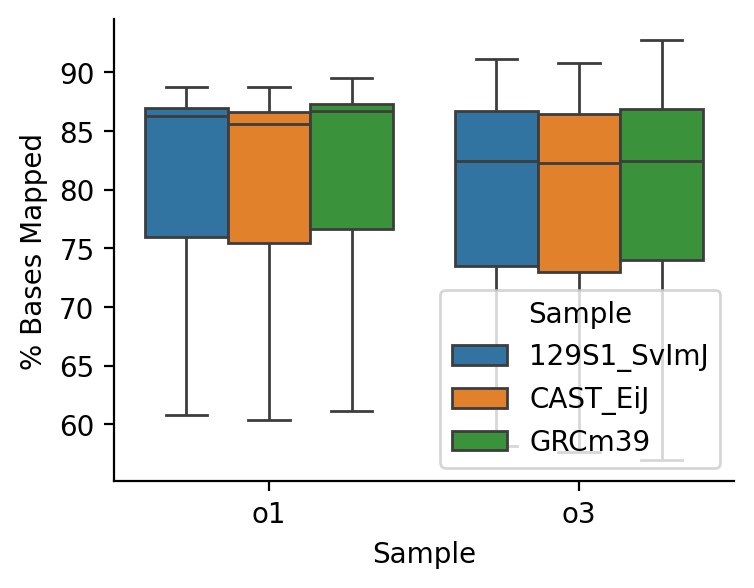

In [4]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 4, 3

sns.boxplot(data=df[df['sample'].isin(['o1', 'o3'])], 
            x='sample',
            y='mapped %',
            hue='ref',
            showfliers=False)

plt.xlabel("Sample")
plt.ylabel("% Bases Mapped")

sns.move_legend(plt.gca(), 
                title='Sample',
                loc='lower right')

sns.despine()

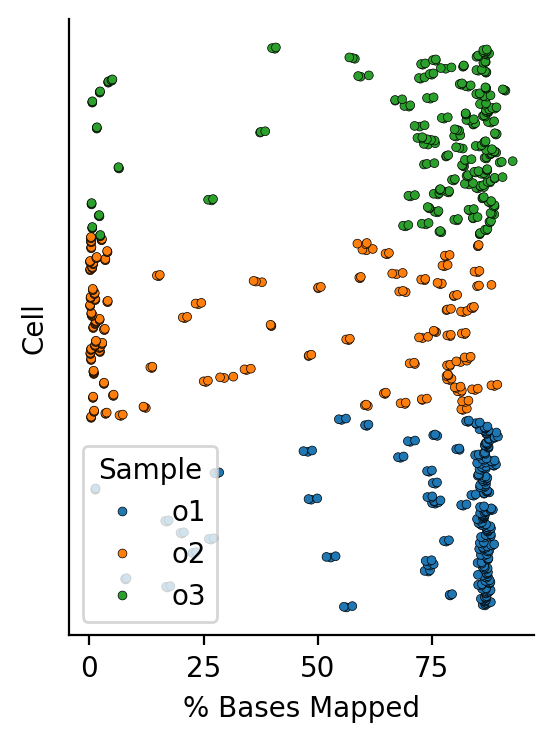

In [7]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 3, 4

pdf = df.copy()
pdf = pdf.reset_index()
pdf = pdf.sort_values(by='index')

sns.scatterplot(data=pdf, 
                x='mapped %',
                y='index',
                hue='sample',
                ec='k',
                s=10)
ax = plt.gca()
_ = ax.set_yticklabels([])
_ = ax.set_yticks([])
plt.ylabel("Cell")
plt.xlabel("% Bases Mapped")
sns.despine()
sns.move_legend(ax, 
                title='Sample',
                loc='lower left')

metric cell    primary  primary mapped  secondary  supplementary
2       b01     4893.0          1826.0     1571.0          768.0
5       b02  1520854.0       1107269.0  1025045.0       566886.0
8       b03  2375733.0       1796279.0  1485536.0       946450.0
11      b04  2586096.0       1911600.0  1515873.0      1036734.0
14      b05  3930505.0       2910243.0  2312764.0      1512943.0
..      ...        ...             ...        ...            ...
272     b91  2552434.0       1906369.0  1548891.0       944986.0
275     b92   202648.0         82489.0    64560.0        41944.0
278     b93  1845768.0       1307670.0  1134049.0       732815.0
281     b94   633218.0        424142.0   380319.0       224599.0
284     b95   457681.0        162183.0   134245.0        82846.0

[95 rows x 5 columns]


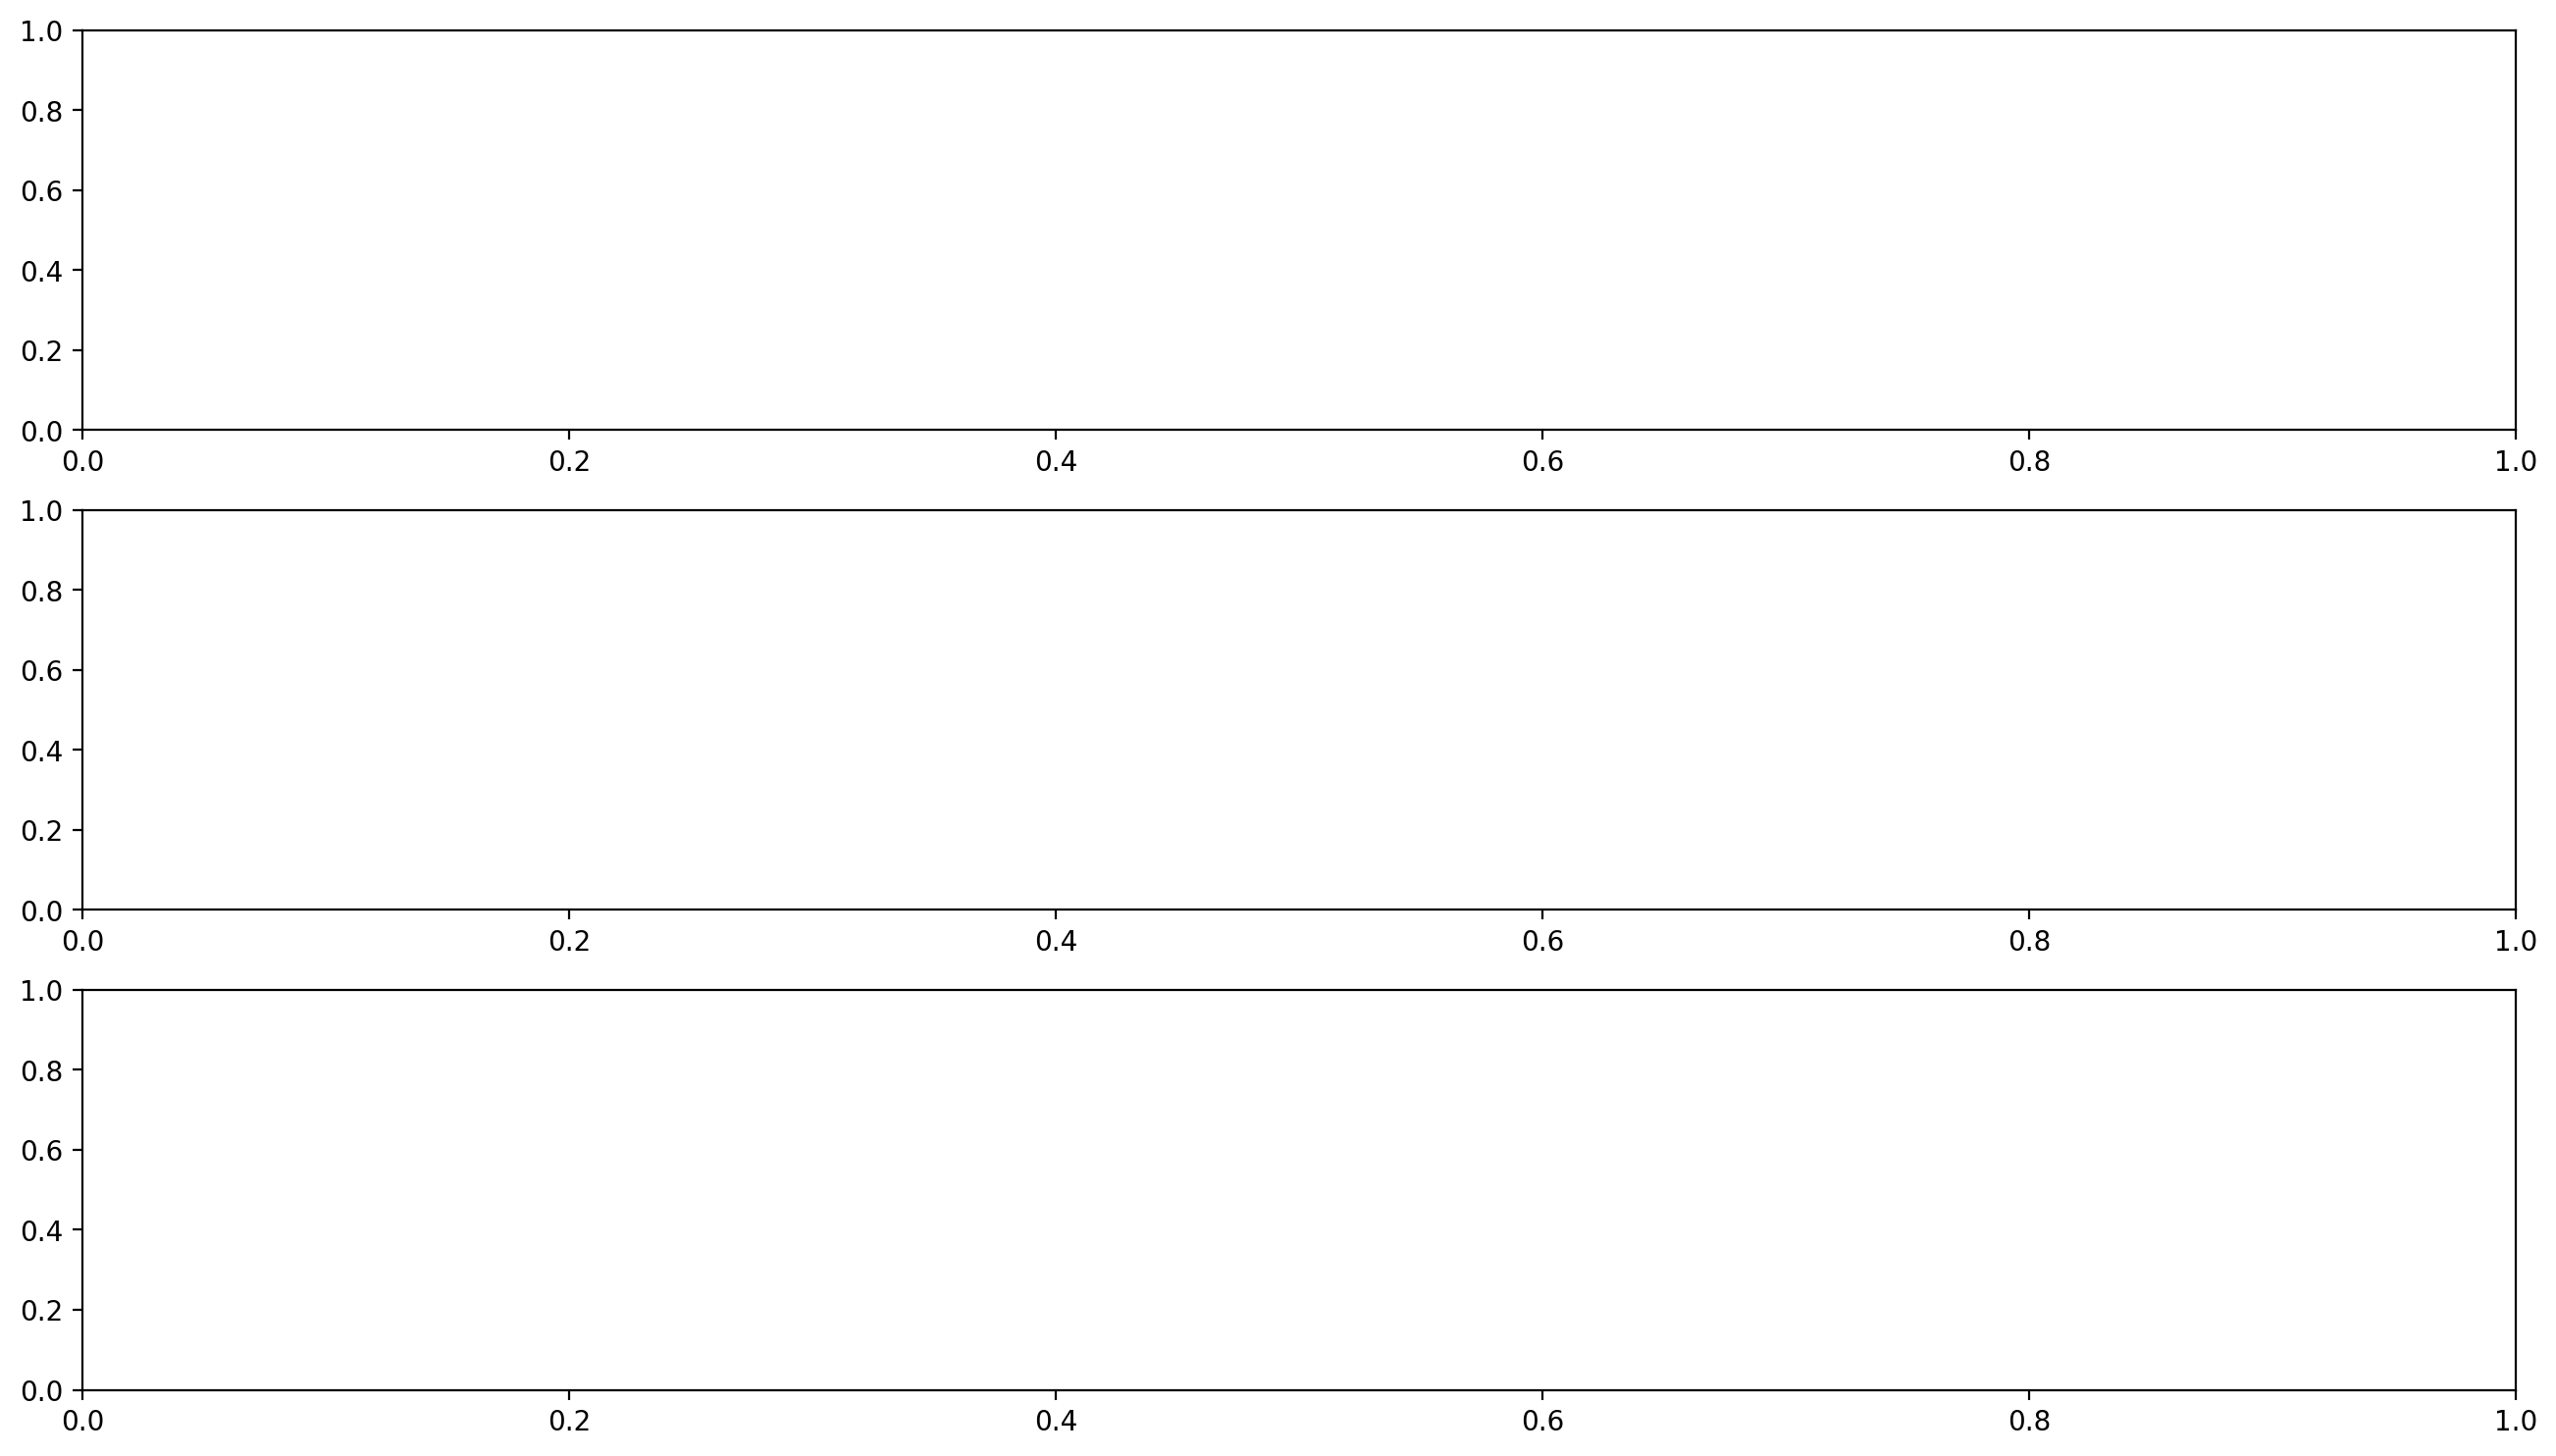

In [12]:
plt.rcParams['figure.dpi'] = 200
plt.rcParams['figure.figsize'] = 16, 9

fig, axs = plt.subplots(3, 1)

ref = 'GRCm39'

for i, (sample, group) in enumerate(df.groupby('sample')):
    group = group[group['ref'] == ref]
    group = group[['cell', 'primary', 'primary mapped', 'secondary', 'supplementary']]
    group = group.set_index('cell')
    group.plot(kind='bar', stacked=True, ec='k', ax=axs[i])
    

    break
    # group = group[['cell', 'One_per', 'Two_per', 'Many_per']]
#     group = group.sort_values(by='Many_per')
#     group = group.set_index('cell')
#     group.plot(kind='bar', stacked=True, ec='k', ax=axs[i])
#     axs[i].set_title(f'Sample {sample}')
#     axs[i].set_ylabel('Percent of reads')
#     axs[i].set_xlabel('')
#     if i != 0:
#         axs[i].legend().remove()
#     else:
#         sns.move_legend(axs[i],
#                         loc='upper right')

# plt.tight_layout()
# sns.despine()

In [6]:
break

SyntaxError: 'break' outside loop (668683560.py, line 1)

In [ ]:
# printdf(df)